In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

#csv files were pulled at 12:30pm 11/21/2021

#get paths to csv files in google drive
path_vaccine = "/content/drive/My Drive/ML Final Project/Data/vaccinations.csv"
path_covid = "/content/drive/My Drive/ML Final Project/Data/owid-covid-data.csv"
path_variant = "/content/drive/My Drive/ML Final Project/Data/covid-variants-area.csv"

#load csv files to dataframes
vaccine = pd.read_csv(path_vaccine)
covid = pd.read_csv(path_covid)
variant = pd.read_csv(path_variant)

#change date columns to datetime objects
vaccine['date'] = vaccine['date'].astype('datetime64[ns]')
covid['date'] = covid['date'].astype('datetime64[ns]')
variant['Day'] = variant['Day'].astype('datetime64[ns]')

#set multi-level indices, remove duplicate dates in variant data frame
vaccine.set_index(['iso_code','date'], inplace = True)
covid.set_index(['iso_code','date'], inplace = True)
variant.rename(columns = {'Code':'iso_code', 'Day':'date'}, inplace=True)
variant = variant.groupby(['iso_code','date'], as_index=False).mean()
variant.set_index(['iso_code','date'], inplace = True)

#join data frames
non_dupes = vaccine.columns.difference(covid.columns)
full = covid.join(vaccine[non_dupes], how='outer', lsuffix='_covid', rsuffix='_vaccine')
full = full.join(variant, how='outer')

#sort data frame using multi-level index
full.sort_values(by = ['iso_code','date'], ascending=True, inplace = True)

#save joined data set to a csv
full.to_csv('/content/drive/My Drive/ML Final Project/Data/full.csv', sep=',')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path_full = "/content/drive/My Drive/ML Final Project/Data/full.csv"
df = pd.read_csv(path_full)
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y-%m')
df.set_index(['iso_code','date'], inplace = True)
df_averaged_by_month = df.groupby(level = ['iso_code','date'] , as_index=True).mean(numeric_only=True)

df_averaged_by_month.to_csv('/content/drive/My Drive/ML Final Project/Data/df_averaged_by_month.csv', sep=',')

df_last_month = df_averaged_by_month.reset_index()[df_averaged_by_month.reset_index()['date']=='2021-11']

print(df_last_month.isna().sum() / len(df_last_month))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

df_last_month.to_csv('/content/drive/My Drive/ML Final Project/Data/df_november_2021.csv', sep=',')

iso_code                                      0.000000
date                                          0.000000
total_cases                                   0.107759
new_cases                                     0.107759
new_cases_smoothed                            0.107759
total_deaths                                  0.142241
new_deaths                                    0.142241
new_deaths_smoothed                           0.107759
total_cases_per_million                       0.112069
new_cases_per_million                         0.112069
new_cases_smoothed_per_million                0.112069
total_deaths_per_million                      0.146552
new_deaths_per_million                        0.146552
new_deaths_smoothed_per_million               0.112069
reproduction_rate                             0.202586
icu_patients                                  0.879310
icu_patients_per_million                      0.879310
hosp_patients                                 0.857759
hosp_patie

In [ ]:
path_full = "/content/drive/My Drive/ML Final Project/Data/full.csv"
df = pd.read_csv(path_full)
df['date'] = pd.to_datetime(df['date'])
df_most_recent_day = df.loc[df.reset_index().groupby(['iso_code'])['date'].idxmax()]
df_most_recent_day.to_csv('/content/drive/My Drive/ML Final Project/Data/df_most_recent_day.csv', sep=',')
print(df_most_recent_day.isna().sum() / len(df_most_recent_day))



iso_code                                      0.000000
date                                          0.000000
continent                                     0.070539
location                                      0.016598
total_cases                                   0.141079
new_cases                                     0.141079
new_cases_smoothed                            0.141079
total_deaths                                  0.174274
new_deaths                                    0.174274
new_deaths_smoothed                           0.141079
total_cases_per_million                       0.145228
new_cases_per_million                         0.145228
new_cases_smoothed_per_million                0.145228
total_deaths_per_million                      0.178423
new_deaths_per_million                        0.178423
new_deaths_smoothed_per_million               0.145228
reproduction_rate                             1.000000
icu_patients                                  1.000000
icu_patien

In [ ]:
path_full = "/content/drive/My Drive/ML Final Project/Data/full.csv"
df = pd.read_csv(path_full)
df_usa_only = df[df['iso_code']=='USA']
df_usa_only.to_csv('/content/drive/My Drive/ML Final Project/Data/df_usa_only.csv', sep=',')
print(df_USA_only.isna().sum() / len(df_USA_only))

iso_code                                      0.000000
date                                          0.000000
continent                                     0.000000
location                                      0.000000
total_cases                                   0.000000
new_cases                                     0.001495
new_cases_smoothed                            0.008969
total_deaths                                  0.056801
new_deaths                                    0.056801
new_deaths_smoothed                           0.008969
total_cases_per_million                       0.000000
new_cases_per_million                         0.001495
new_cases_smoothed_per_million                0.008969
total_deaths_per_million                      0.056801
new_deaths_per_million                        0.056801
new_deaths_smoothed_per_million               0.008969
reproduction_rate                             0.079223
icu_patients                                  0.263079
icu_patien

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
iso_code                                      0.000000
date                                          0.000000
continent                                     0.004523
location                                      0.004523
total_cases                                   0.021257
new_cases                                     0.021257
new_cases_smoothed                            0.021257
total_deaths                                  0.021257
new_deaths                                    0.021257
new_deaths_smoothed                           0.021257
total_cases_per_million                       0.021257
new_cases_per_million                         0.021257
new_cases_smoothed_per_million                0.021257
total_deaths_per_million                      0.021257
new_deaths_per_million                        0.021257
new_deaths_smoothed_per_million               

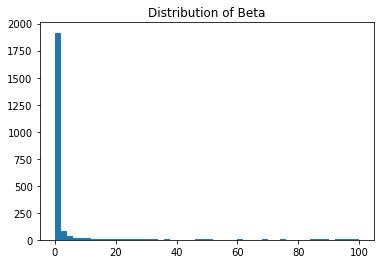

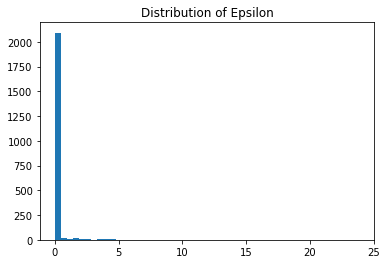

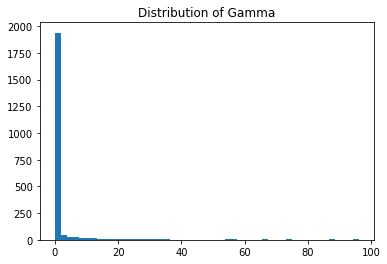

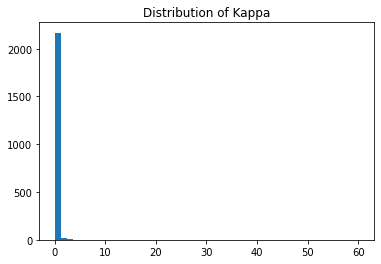

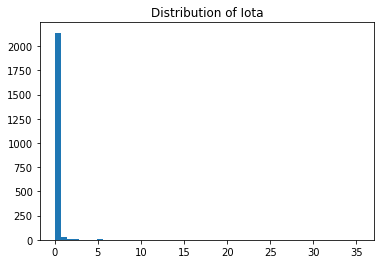

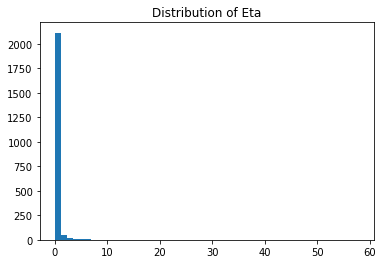

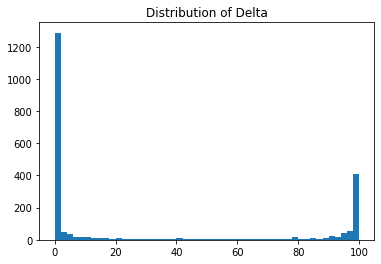

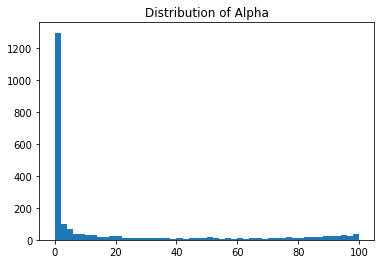

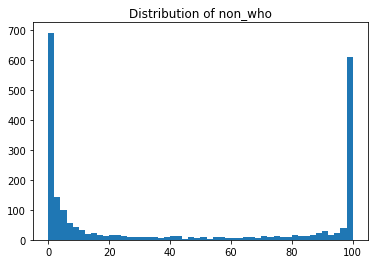

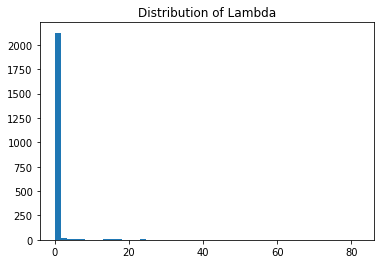

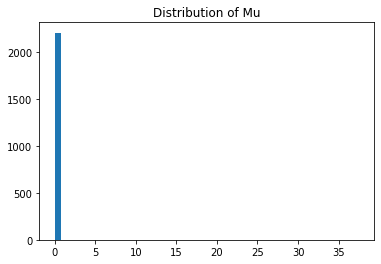

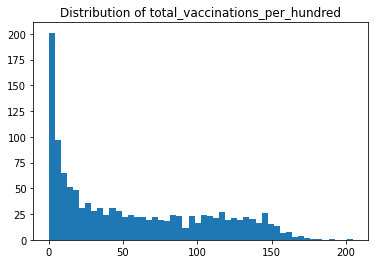

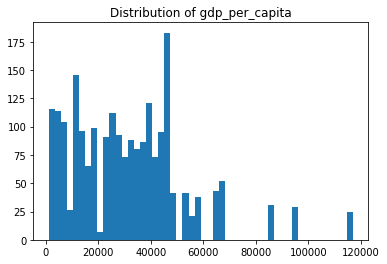

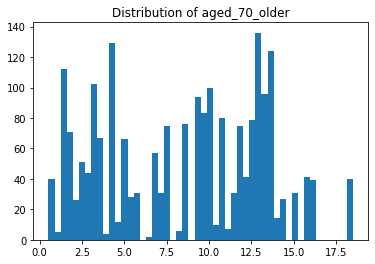

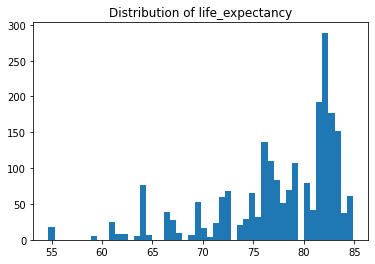

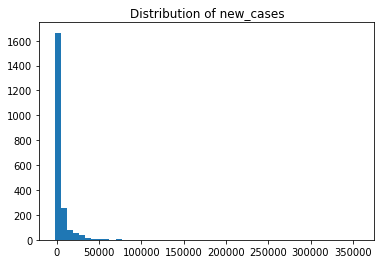

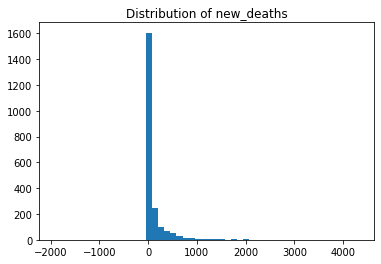

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

path_full = "/content/drive/My Drive/ML Final Project/Data/full.csv"
df = pd.read_csv(path_full)
#df.set_index(['iso_code','date'], inplace = True)
df = df[df['Alpha'].notna()]

df.to_csv('/content/drive/My Drive/ML Final Project/Data/logan_biweekly.csv', sep=',')

print(df.isna().sum() / len(df))

df_sub = df[['Beta','Epsilon','Gamma','Kappa','Iota','Eta','Delta','Alpha','non_who','Lambda','Mu', 'total_vaccinations_per_hundred','gdp_per_capita','aged_70_older','life_expectancy','new_cases','new_deaths']]
for column in df_sub.columns:
  plt.hist(df_sub[column], bins=50)
  plt.title('Distribution of ' + str(column))
  plt.savefig('plot_' + str(column) + '.jpg')
  plt.show()
